In [ ]:
#Steps - LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Step 1: Data Preprocessing
btc_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_Bitcoin.csv")
eth_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_Ethereum.csv")
xrp_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_XRP.csv")
ltc_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_Litecoin.csv")
usdc_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_USDCoin.csv")

df = pd.concat([btc_df, eth_df, xrp_df, ltc_df, usdc_df])
df.to_csv("cryptocurrency.csv", index=False)
data = df.copy()

# Step 2: Data Preparation
selected_features = ['Open', 'Close', 'Volume']

# Splitting into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Scaling the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[selected_features])
test_scaled = scaler.transform(test_data[selected_features])

# Creating input sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Length of input sequences
X_train, y_train = create_sequences(train_scaled, sequence_length)
X_test, y_test = create_sequences(test_scaled, sequence_length)

# Reshaping input sequences to fit LSTM input shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], len(selected_features)))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(selected_features)))

# Step 3: Model Building
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], len(selected_features))))
model.add(LSTM(units=50))
model.add(Dense(units=len(selected_features)))

# Step 4: Model Training
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 5: Model Evaluation
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scaling on predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Step 6: Model Prediction
new_data = data.tail(sequence_length)
new_data_scaled = scaler.transform(new_data[selected_features])
new_data_reshaped = np.reshape(new_data_scaled, (1, sequence_length, len(selected_features)))
predicted_price = model.predict(new_data_reshaped)
predicted_price = scaler.inverse_transform(predicted_price)

print("Predicted Price:", predicted_price)


Epoch 1/10
301/301 [==============================] - 10s 16ms/step - loss: 5.7016e-04
Epoch 2/10
301/301 [==============================] - 4s 14ms/step - loss: 2.6595e-04
Epoch 3/10
301/301 [==============================] - 5s 17ms/step - loss: 2.3849e-04
Epoch 4/10
301/301 [==============================] - 4s 14ms/step - loss: 1.9454e-04
Epoch 5/10
301/301 [==============================] - 4s 14ms/step - loss: 1.7529e-04
Epoch 6/10
301/301 [==============================] - 5s 17ms/step - loss: 1.7528e-04
Epoch 7/10
301/301 [==============================] - 4s 15ms/step - loss: 1.4415e-04
Epoch 8/10
301/301 [==============================] - 5s 15ms/step - loss: 1.3617e-04
Epoch 9/10
301/301 [==============================] - 5s 17ms/step - loss: 1.2356e-04
Epoch 10/10
75/75 [==============================] - 1s 8ms/step
Train RMSE: 2558423034.2709675
Test RMSE: 572586049.7591066
1/1 [==============================] - 0s 41ms/step
Predicted Price: [[2.6517351e+01 9.7152733e+01 2

In [ ]:
#For each Coin

Epoch 1/10
75/75 [==============================] - 5s 14ms/step - loss: 0.0065
Epoch 2/10
75/75 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 3/10
75/75 [==============================] - 1s 16ms/step - loss: 0.0011
Epoch 4/10
75/75 [==============================] - 1s 15ms/step - loss: 0.0010
Epoch 5/10
75/75 [==============================] - 1s 17ms/step - loss: 9.8075e-04
Epoch 6/10
75/75 [==============================] - 2s 22ms/step - loss: 9.6219e-04
Epoch 7/10
75/75 [==============================] - 1s 18ms/step - loss: 8.7307e-04
Epoch 8/10
75/75 [==============================] - 1s 13ms/step - loss: 8.0474e-04
Epoch 9/10
75/75 [==============================] - 1s 14ms/step - loss: 7.7042e-04
Epoch 10/10
19/19 [==============================] - 0s 5ms/step
Bitcoin - Train RMSE: 916366426.9810658
Bitcoin - Test RMSE: 9647862609.465996
1/1 [==============================] - 0s 31ms/step
Bitcoin - Predicted Price: [[2.8573281e+04 2.8465873e+04 2.90319

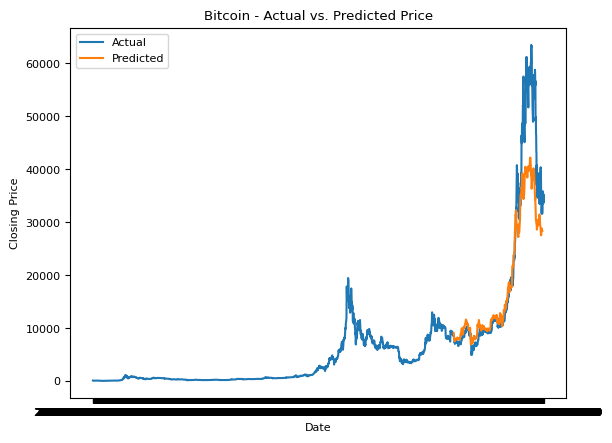

Epoch 1/10
54/54 [==============================] - 6s 15ms/step - loss: 0.0072
Epoch 2/10
54/54 [==============================] - 1s 16ms/step - loss: 0.0016
Epoch 3/10
54/54 [==============================] - 1s 17ms/step - loss: 0.0015
Epoch 4/10
54/54 [==============================] - 1s 16ms/step - loss: 0.0014
Epoch 5/10
54/54 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 6/10
54/54 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 7/10
54/54 [==============================] - 1s 15ms/step - loss: 0.0014
Epoch 8/10
54/54 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 9/10
54/54 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 10/10
14/14 [==============================] - 0s 5ms/step
Ethereum - Train RMSE: 725069661.95059
Ethereum - Test RMSE: 6267851151.706362
1/1 [==============================] - 0s 26ms/step
Ethereum - Predicted Price: [[1.8955973e+03 1.9481188e+03 1.5326217e+10]]


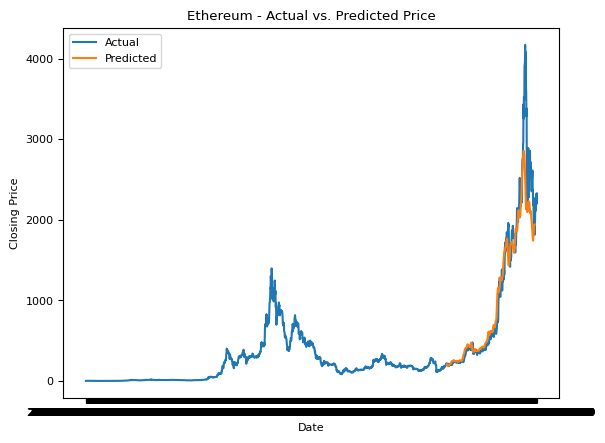

Epoch 1/10
72/72 [==============================] - 4s 12ms/step - loss: 0.0026
Epoch 2/10
72/72 [==============================] - 1s 19ms/step - loss: 0.0015
Epoch 3/10
72/72 [==============================] - 1s 19ms/step - loss: 0.0014
Epoch 4/10
72/72 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 5/10
72/72 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 6/10
72/72 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 7/10
72/72 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 8/10
72/72 [==============================] - 1s 11ms/step - loss: 0.0010
Epoch 9/10
72/72 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 10/10
18/18 [==============================] - 1s 5ms/step
XRP - Train RMSE: 271809448.0582588
XRP - Test RMSE: 2514377022.999841
1/1 [==============================] - 0s 24ms/step
XRP - Predicted Price: [[6.5188682e-01 6.6859823e-01 1.7930385e+09]]


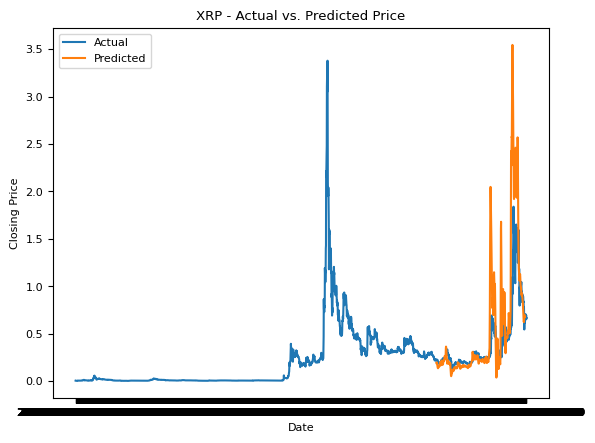

Epoch 1/10
75/75 [==============================] - 5s 14ms/step - loss: 0.0046
Epoch 2/10
75/75 [==============================] - 1s 17ms/step - loss: 0.0015
Epoch 3/10
75/75 [==============================] - 2s 21ms/step - loss: 0.0014
Epoch 4/10
75/75 [==============================] - 2s 21ms/step - loss: 0.0013
Epoch 5/10
75/75 [==============================] - 1s 15ms/step - loss: 0.0013
Epoch 6/10
75/75 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 7/10
75/75 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 8/10
75/75 [==============================] - 1s 14ms/step - loss: 0.0010
Epoch 9/10
75/75 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 10/10
19/19 [==============================] - 0s 4ms/step
Litecoin - Train RMSE: 180308395.88579452
Litecoin - Test RMSE: 914620600.4567164
1/1 [==============================] - 0s 37ms/step
Litecoin - Predicted Price: [[1.4555357e+02 1.4389825e+02 1.7199528e+09]]


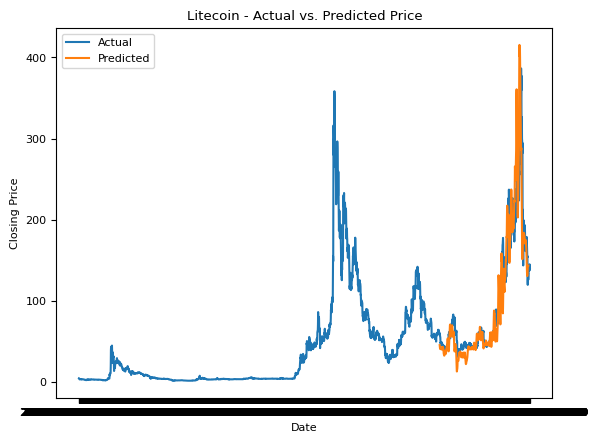

Epoch 1/10
25/25 [==============================] - 5s 16ms/step - loss: 0.0403
Epoch 2/10
25/25 [==============================] - 0s 16ms/step - loss: 0.0064
Epoch 3/10
25/25 [==============================] - 0s 16ms/step - loss: 0.0043
Epoch 4/10
25/25 [==============================] - 0s 17ms/step - loss: 0.0039
Epoch 5/10
25/25 [==============================] - 0s 17ms/step - loss: 0.0038
Epoch 6/10
25/25 [==============================] - 0s 15ms/step - loss: 0.0037
Epoch 7/10
25/25 [==============================] - 0s 14ms/step - loss: 0.0037
Epoch 8/10
25/25 [==============================] - 0s 14ms/step - loss: 0.0037
Epoch 9/10
25/25 [==============================] - 0s 14ms/step - loss: 0.0037
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
USDCoin - Train RMSE: 89249687.28603
USDCoin - Test RMSE: 482314384.47673655
1/1 [==============================] - 0s 26ms/step
USDCoin - Predicted Price: [[9.9722195e-01 9.9366814e-01 1.6953951e+09]]


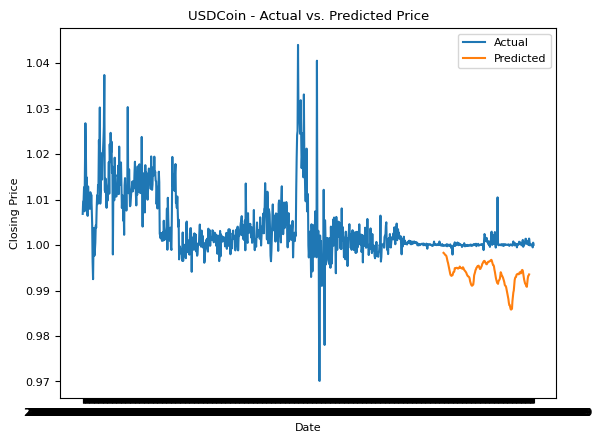

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# List of coins
coins = ["Bitcoin", "Ethereum", "XRP", "Litecoin", "USDCoin"]

# Loop through each coin
for coin in coins:
    # Step 1: Data Preprocessing
    url = f"https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_{coin}.csv"
    df = pd.read_csv(url)
    selected_features = ['Open', 'Close', 'Volume']

    # Step 2: Data Preparation
    train_size = int(len(df) * 0.8)
    train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data[selected_features])
    test_scaled = scaler.transform(test_data[selected_features])

    sequence_length = 10
    X_train, y_train = create_sequences(train_scaled, sequence_length)
    X_test, y_test = create_sequences(test_scaled, sequence_length)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], len(selected_features)))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(selected_features)))

    # Step 3: Model Building
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], len(selected_features))))
    model.add(LSTM(units=50))
    model.add(Dense(units=len(selected_features)))

    # Step 4: Model Training
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Step 5: Model Evaluation
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    print(f"{coin} - Train RMSE: {train_rmse}")
    print(f"{coin} - Test RMSE: {test_rmse}")

    # Step 6: Model Prediction
    new_data = df.tail(sequence_length)
    new_data_scaled = scaler.transform(new_data[selected_features])
    new_data_reshaped = np.reshape(new_data_scaled, (1, sequence_length, len(selected_features)))
    predicted_price = model.predict(new_data_reshaped)
    predicted_price = scaler.inverse_transform(predicted_price)
    print(f"{coin} - Predicted Price: {predicted_price}")

    # Step 7: Visualize Predictions
    test_dates = test_data['Date'].reset_index(drop=True)[:len(test_predictions)]
    plt.plot(df['Date'], df['Close'], label='Actual')
    plt.plot(test_dates, test_predictions[:, 1], label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(f"{coin} - Actual vs. Predicted Price")
    plt.legend()
    plt.show()


In [ ]:
# Chnages the x-axis for better Visualization 

Epoch 1/10
75/75 [==============================] - 7s 16ms/step - loss: 0.0055
Epoch 2/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 3/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 4/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0010
Epoch 5/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0010
Epoch 6/10
75/75 [==============================] - 1s 16ms/step - loss: 9.4830e-04
Epoch 7/10
75/75 [==============================] - 1s 16ms/step - loss: 9.7112e-04
Epoch 8/10
75/75 [==============================] - 1s 16ms/step - loss: 9.1235e-04
Epoch 9/10
75/75 [==============================] - 1s 15ms/step - loss: 8.7844e-04
Epoch 10/10
19/19 [==============================] - 0s 6ms/step
Bitcoin - Train RMSE: 942023618.170444
Bitcoin - Test RMSE: 12819271900.035448
1/1 [==============================] - 0s 49ms/step
Bitcoin - Predicted Price: [[2.7614340e+04 2.6337658e+04 2.1075380e+

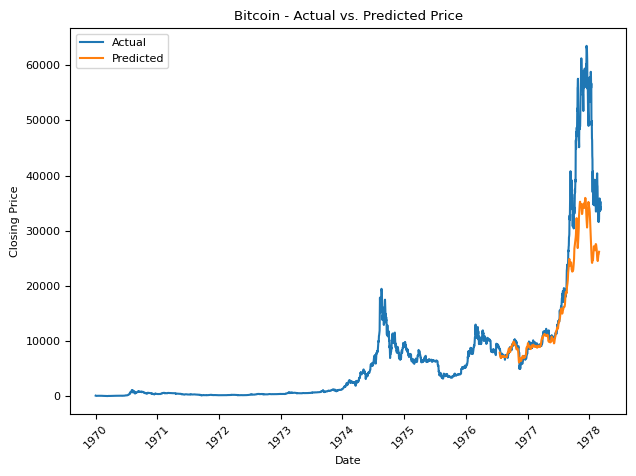

Epoch 1/10
54/54 [==============================] - 5s 16ms/step - loss: 0.0085
Epoch 2/10
54/54 [==============================] - 1s 15ms/step - loss: 0.0016
Epoch 3/10
54/54 [==============================] - 1s 15ms/step - loss: 0.0014
Epoch 4/10
54/54 [==============================] - 1s 17ms/step - loss: 0.0014
Epoch 5/10
54/54 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 6/10
54/54 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 7/10
54/54 [==============================] - 1s 19ms/step - loss: 0.0015
Epoch 8/10
54/54 [==============================] - 1s 23ms/step - loss: 0.0013
Epoch 9/10
54/54 [==============================] - 1s 22ms/step - loss: 0.0012
Epoch 10/10
14/14 [==============================] - 0s 6ms/step
Ethereum - Train RMSE: 746526598.8892049
Ethereum - Test RMSE: 6657092048.332884
1/1 [==============================] - 0s 32ms/step
Ethereum - Predicted Price: [[1.8529417e+03 1.8127521e+03 1.4379942e+10]]


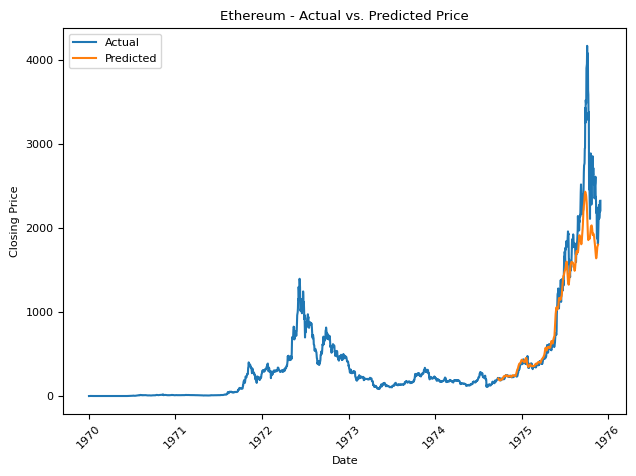

Epoch 1/10
72/72 [==============================] - 4s 11ms/step - loss: 0.0029
Epoch 2/10
72/72 [==============================] - 1s 11ms/step - loss: 0.0015
Epoch 3/10
72/72 [==============================] - 1s 18ms/step - loss: 0.0015
Epoch 4/10
72/72 [==============================] - 1s 17ms/step - loss: 0.0014
Epoch 5/10
72/72 [==============================] - 1s 15ms/step - loss: 0.0013
Epoch 6/10
72/72 [==============================] - 1s 11ms/step - loss: 0.0012
Epoch 7/10
72/72 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 8/10
72/72 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 9/10
72/72 [==============================] - 1s 11ms/step - loss: 0.0010
Epoch 10/10
18/18 [==============================] - 1s 5ms/step
XRP - Train RMSE: 279270571.5793236
XRP - Test RMSE: 2333795761.635824
1/1 [==============================] - 0s 27ms/step
XRP - Predicted Price: [[7.5816673e-01 7.8494763e-01 2.2944238e+09]]


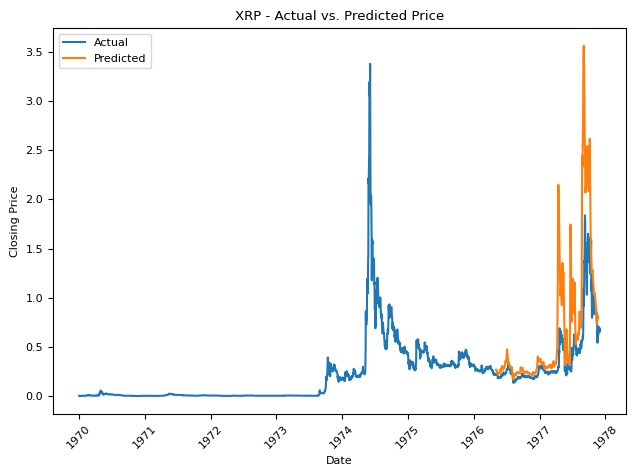

Epoch 1/10
75/75 [==============================] - 8s 16ms/step - loss: 0.0038
Epoch 2/10
75/75 [==============================] - 1s 17ms/step - loss: 0.0014
Epoch 3/10
75/75 [==============================] - 1s 16ms/step - loss: 0.0014
Epoch 4/10
75/75 [==============================] - 1s 15ms/step - loss: 0.0013
Epoch 5/10
75/75 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 6/10
75/75 [==============================] - 1s 18ms/step - loss: 0.0011
Epoch 7/10
75/75 [==============================] - 2s 21ms/step - loss: 0.0011
Epoch 8/10
75/75 [==============================] - 1s 18ms/step - loss: 0.0010
Epoch 9/10
75/75 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 10/10
19/19 [==============================] - 0s 5ms/step
Litecoin - Train RMSE: 173583471.06811047
Litecoin - Test RMSE: 925001286.1884215
1/1 [==============================] - 0s 29ms/step
Litecoin - Predicted Price: [[1.4163756e+02 1.4341159e+02 1.5324675e+09]]


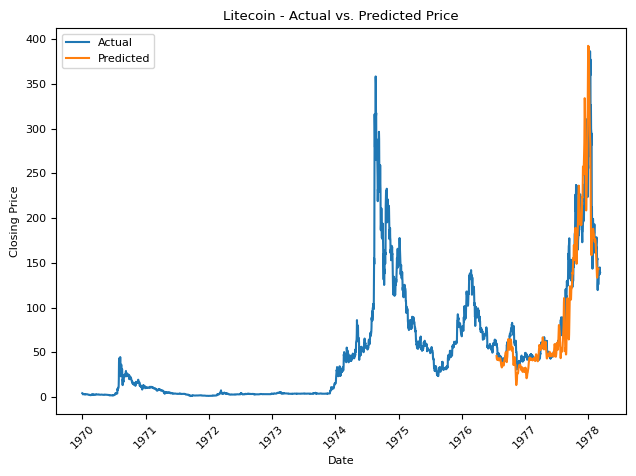

Epoch 1/10
25/25 [==============================] - 6s 23ms/step - loss: 0.0464
Epoch 2/10
25/25 [==============================] - 1s 20ms/step - loss: 0.0065
Epoch 3/10
25/25 [==============================] - 1s 21ms/step - loss: 0.0045
Epoch 4/10
25/25 [==============================] - 0s 14ms/step - loss: 0.0038
Epoch 5/10
25/25 [==============================] - 0s 15ms/step - loss: 0.0038
Epoch 6/10
25/25 [==============================] - 0s 17ms/step - loss: 0.0037
Epoch 7/10
25/25 [==============================] - 0s 17ms/step - loss: 0.0037
Epoch 8/10
25/25 [==============================] - 0s 15ms/step - loss: 0.0036
Epoch 9/10
25/25 [==============================] - 0s 14ms/step - loss: 0.0036
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
USDCoin - Train RMSE: 87672976.37842406
USDCoin - Test RMSE: 478194655.07935643
1/1 [==============================] - 0s 34ms/step
USDCoin - Predicted Price: [[9.9647403e-01 9.9522257e-01 1.7483560e+09]]


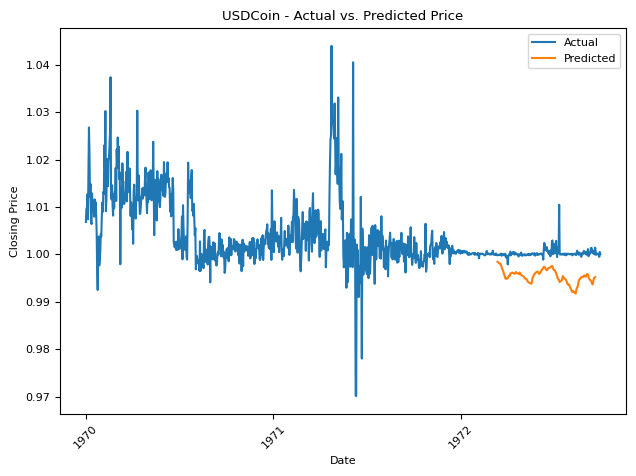

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# List of coins
coins = ["Bitcoin", "Ethereum", "XRP", "Litecoin", "USDCoin"]

# Loop through each coin
for coin in coins:
    # Step 1: Data Preprocessing
    url = f"https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_{coin}.csv"
    df = pd.read_csv(url)
    selected_features = ['Open', 'Close', 'Volume']

    # Step 2: Data Preparation
    train_size = int(len(df) * 0.8)
    train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data[selected_features])
    test_scaled = scaler.transform(test_data[selected_features])

    sequence_length = 10
    X_train, y_train = create_sequences(train_scaled, sequence_length)
    X_test, y_test = create_sequences(test_scaled, sequence_length)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], len(selected_features)))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(selected_features)))

    # Step 3: Model Building
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], len(selected_features))))
    model.add(LSTM(units=50))
    model.add(Dense(units=len(selected_features)))

    # Step 4: Model Training
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Step 5: Model Evaluation
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    print(f"{coin} - Train RMSE: {train_rmse}")
    print(f"{coin} - Test RMSE: {test_rmse}")

    # Step 6: Model Prediction
    new_data = df.tail(sequence_length)
    new_data_scaled = scaler.transform(new_data[selected_features])
    new_data_reshaped = np.reshape(new_data_scaled, (1, sequence_length, len(selected_features)))
    predicted_price = model.predict(new_data_reshaped)
    predicted_price = scaler.inverse_transform(predicted_price)
    print(f"{coin} - Predicted Price: {predicted_price}")

    # Step 7: Visualize Predictions
    test_dates = test_data['Date'].reset_index(drop=True)[:len(test_predictions)]
    fig, ax = plt.subplots()
    ax.plot(df['Date'], df['Close'], label='Actual')
    ax.plot(test_dates, test_predictions[:, 1], label='Predicted')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.set_title(f"{coin} - Actual vs. Predicted Price")
    ax.legend()

    # Format x-axis ticks as years
    years = mdates.YearLocator()
    years_fmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_tick_params(rotation=45)

    plt.tight_layout()
    plt.show()


Epoch 1/10
75/75 [==============================] - 6s 16ms/step - loss: 0.0054
Epoch 2/10
75/75 [==============================] - 1s 15ms/step - loss: 0.0012
Epoch 3/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 4/10
75/75 [==============================] - 1s 15ms/step - loss: 0.0010
Epoch 5/10
75/75 [==============================] - 1s 14ms/step - loss: 9.7137e-04
Epoch 6/10
75/75 [==============================] - 1s 13ms/step - loss: 9.6335e-04
Epoch 7/10
75/75 [==============================] - 1s 19ms/step - loss: 9.2532e-04
Epoch 8/10
75/75 [==============================] - 2s 22ms/step - loss: 8.8101e-04
Epoch 9/10
75/75 [==============================] - 1s 13ms/step - loss: 8.2533e-04
Epoch 10/10
19/19 [==============================] - 0s 5ms/step
Bitcoin - Train RMSE: 962421691.4837579
Bitcoin - Test RMSE: 10374995511.463604
1/1 [==============================] - 0s 30ms/step
Bitcoin - Predicted Price: [[2.7710705e+04 2.6202779e+04 2.8651

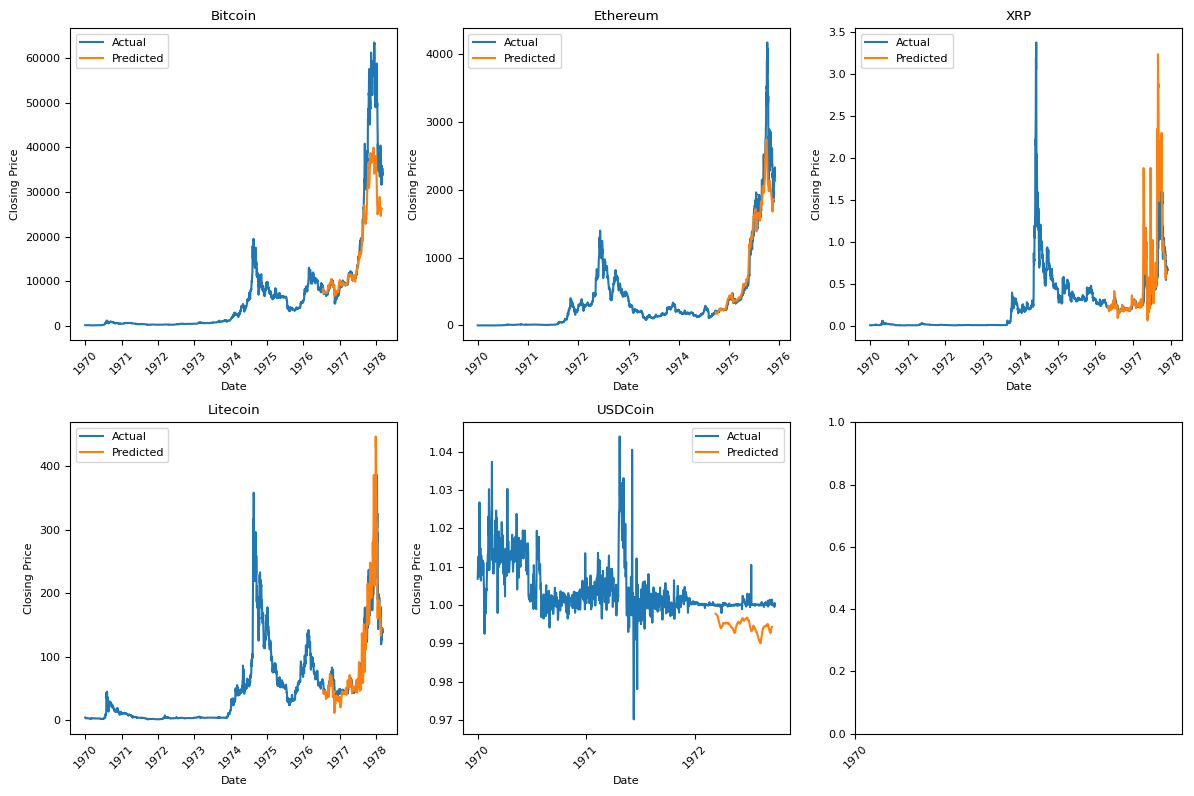

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# List of coins
coins = ["Bitcoin", "Ethereum", "XRP", "Litecoin", "USDCoin"]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop through each coin and subplot
for i, coin in enumerate(coins):
    # Step 1: Data Preprocessing
    url = f"https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_{coin}.csv"
    df = pd.read_csv(url)
    selected_features = ['Open', 'Close', 'Volume']

    # Step 2: Data Preparation
    train_size = int(len(df) * 0.8)
    train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data[selected_features])
    test_scaled = scaler.transform(test_data[selected_features])

    sequence_length = 10
    X_train, y_train = create_sequences(train_scaled, sequence_length)
    X_test, y_test = create_sequences(test_scaled, sequence_length)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], len(selected_features)))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(selected_features)))

    # Step 3: Model Building
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], len(selected_features))))
    model.add(LSTM(units=50))
    model.add(Dense(units=len(selected_features)))

    # Step 4: Model Training
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Step 5: Model Evaluation
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    print(f"{coin} - Train RMSE: {train_rmse}")
    print(f"{coin} - Test RMSE: {test_rmse}")

    # Step 6: Model Prediction
    new_data = df.tail(sequence_length)
    new_data_scaled = scaler.transform(new_data[selected_features])
    new_data_reshaped = np.reshape(new_data_scaled, (1, sequence_length, len(selected_features)))
    predicted_price = model.predict(new_data_reshaped)
    predicted_price = scaler.inverse_transform(predicted_price)
    print(f"{coin} - Predicted Price: {predicted_price}")

    # Step 7: Visualize Predictions
    test_dates = test_data['Date'].reset_index(drop=True)[:len(test_predictions)]
    axs[i].plot(df['Date'], df['Close'], label='Actual')
    axs[i].plot(test_dates, test_predictions[:, 1], label='Predicted')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Closing Price')
    axs[i].set_title(coin)
    axs[i].legend()

# Format x-axis ticks as years and set rotation
for ax in axs:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
#Evaluation of Model

Epoch 1/10
75/75 [==============================] - 6s 16ms/step - loss: 0.0053
Epoch 2/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 3/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 4/10
75/75 [==============================] - 1s 14ms/step - loss: 0.0010
Epoch 5/10
75/75 [==============================] - 1s 15ms/step - loss: 9.8772e-04
Epoch 6/10
75/75 [==============================] - 1s 13ms/step - loss: 9.4850e-04
Epoch 7/10
75/75 [==============================] - 1s 13ms/step - loss: 8.5873e-04
Epoch 8/10
75/75 [==============================] - 1s 13ms/step - loss: 8.5995e-04
Epoch 9/10
75/75 [==============================] - 1s 13ms/step - loss: 8.4202e-04
Epoch 10/10
19/19 [==============================] - 0s 5ms/step
Bitcoin - Train RMSE: 920040616.8720472
Bitcoin - Test RMSE: 10818497716.166662
1/1 [==============================] - 0s 23ms/step
Bitcoin - Predicted Price: [[2.7399379e+04 2.7330652e+04 2.5059

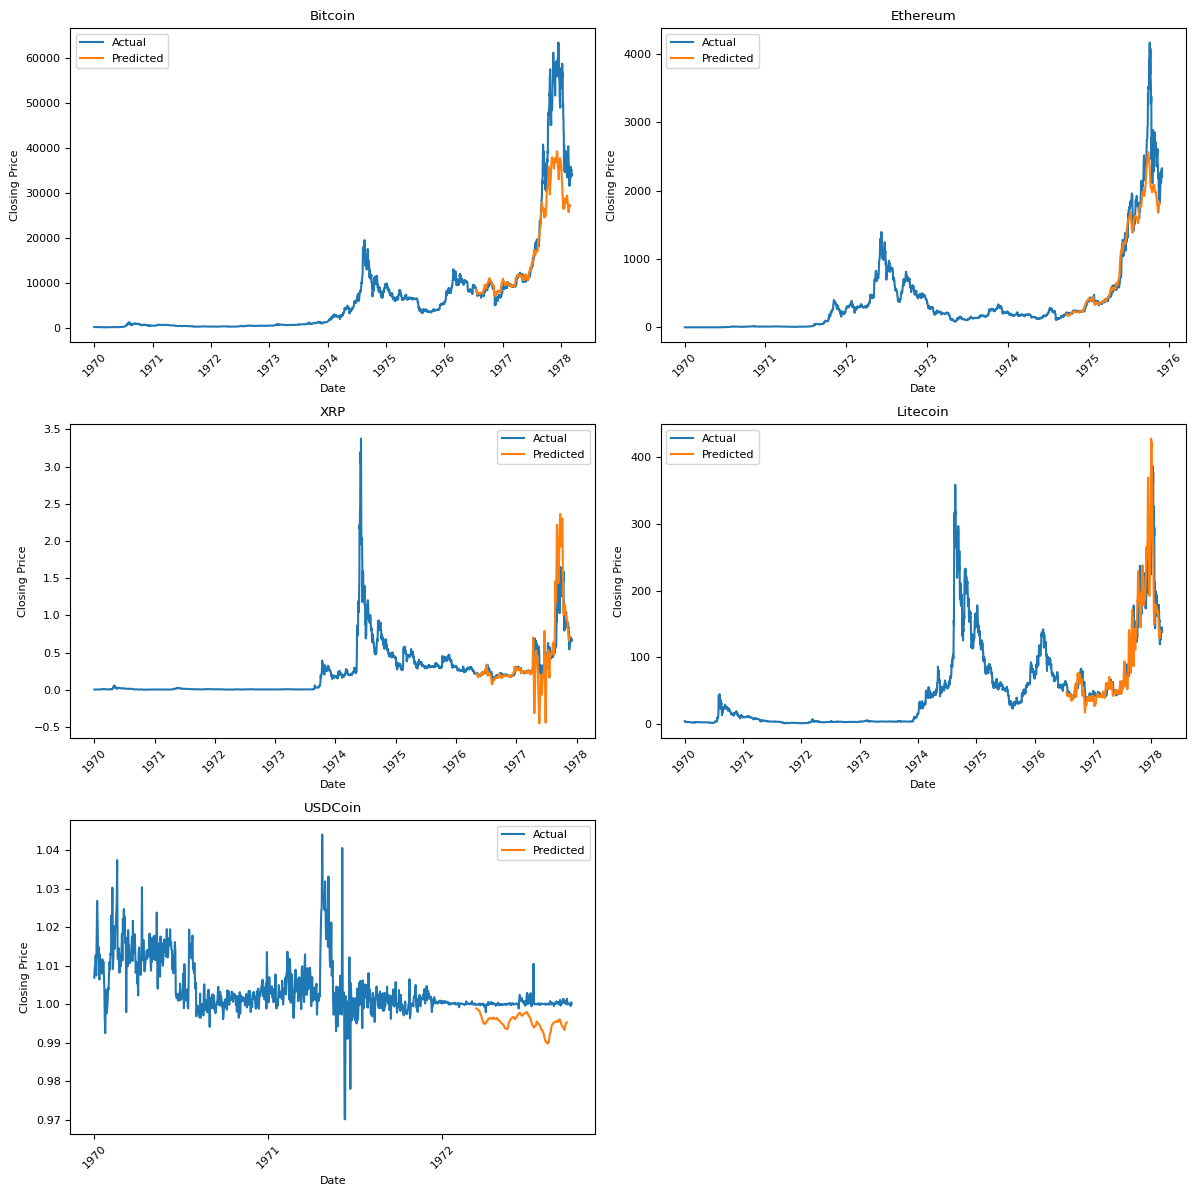

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# List of coins
coins = ["Bitcoin", "Ethereum", "XRP", "Litecoin", "USDCoin"]

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop through each coin and subplot
for i, coin in enumerate(coins):
    # Step 1: Data Preprocessing
    url = f"https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_{coin}.csv"
    df = pd.read_csv(url)
    selected_features = ['Open', 'Close', 'Volume']

    # Step 2: Data Preparation
    train_size = int(len(df) * 0.8)
    train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data[selected_features])
    test_scaled = scaler.transform(test_data[selected_features])

    sequence_length = 10
    X_train, y_train = create_sequences(train_scaled, sequence_length)
    X_test, y_test = create_sequences(test_scaled, sequence_length)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], len(selected_features)))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(selected_features)))

    # Step 3: Model Building
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], len(selected_features))))
    model.add(LSTM(units=50))
    model.add(Dense(units=len(selected_features)))

    # Step 4: Model Training
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Step 5: Model Evaluation
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    print(f"{coin} - Train RMSE: {train_rmse}")
    print(f"{coin} - Test RMSE: {test_rmse}")

    # Step 6: Model Prediction
    new_data = df.tail(sequence_length)
    new_data_scaled = scaler.transform(new_data[selected_features])
    new_data_reshaped = np.reshape(new_data_scaled, (1, sequence_length, len(selected_features)))
    predicted_price = model.predict(new_data_reshaped)
    predicted_price = scaler.inverse_transform(predicted_price)
    print(f"{coin} - Predicted Price: {predicted_price}")

    # Step 7: Visualize Predictions
    test_dates = test_data['Date'].reset_index(drop=True)[:len(test_predictions)]
    axs[i].plot(df['Date'], df['Close'], label='Actual')
    axs[i].plot(test_dates, test_predictions[:, 1], label='Predicted')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Closing Price')
    axs[i].set_title(coin)
    axs[i].legend()

    # Format x-axis ticks as years and set rotation
    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axs[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if the number of coins is less than 6
if len(coins) < 6:
    for j in range(len(coins), 6):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [ ]:
#Evaluation with variour Parameters

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create an empty dataframe to store the evaluation metrics
evaluation_df = pd.DataFrame(columns=['Coin', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE', 'R2 Score'])

# Loop through each coin
for coin in coins:
    # ... (Previous code for each coin)

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)

    # Append the results to the dataframe
    evaluation_df = evaluation_df.append({
        'Coin': coin,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'R2 Score': r2
    }, ignore_index=True)

# Display the evaluation table
print(evaluation_df)


       Coin    Train RMSE     Test RMSE     Train MAE      Test MAE  \
0   Bitcoin  8.018480e+17  4.426796e+18  3.312167e+17  2.359599e+18   
1  Ethereum  8.018480e+17  4.426796e+18  3.312167e+17  2.359599e+18   
2       XRP  8.018480e+17  4.426796e+18  3.312167e+17  2.359599e+18   
3  Litecoin  8.018480e+17  4.426796e+18  3.312167e+17  2.359599e+18   
4   USDCoin  8.018480e+17  4.426796e+18  3.312167e+17  2.359599e+18   

        R2 Score  
0 -294806.314176  
1 -294806.314176  
2 -294806.314176  
3 -294806.314176  
4 -294806.314176  


<ipython-input-26-391e74d8d8b8>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
<ipython-input-26-391e74d8d8b8>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
<ipython-input-26-391e74d8d8b8>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
<ipython-input-26-391e74d8d8b8>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append({
<ipython-input-26-391e74d8d8b8>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [ ]:
#The model evaluation metrics (RMSE, MAE, R2 score) are computed and printed for each coin

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# List of coins
coins = ["Bitcoin", "Ethereum", "XRP", "Litecoin", "USDCoin"]

# Create a table to store evaluation metrics
metrics_table = pd.DataFrame(columns=["Coin", "Train RMSE", "Test RMSE", "Train MAE", "Test MAE", "R2 Score"])

# Loop through each coin
for coin in coins:
    # Step 1: Data Preprocessing
    url = f"https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_{coin}.csv"
    df = pd.read_csv(url)
    selected_features = ['Open', 'Close', 'Volume']

    # ...

    # Step 5: Model Evaluation
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)

    metrics_table = metrics_table.append({
        "Coin": coin,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "R2 Score": r2
    }, ignore_index=True)

# Display the metrics table
print(metrics_table)


14/14 [==============================] - 0s 5ms/step


<ipython-input-32-6abf9900e157>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({


14/14 [==============================] - 0s 6ms/step


<ipython-input-32-6abf9900e157>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({


14/14 [==============================] - 0s 5ms/step


<ipython-input-32-6abf9900e157>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({


14/14 [==============================] - 0s 6ms/step


<ipython-input-32-6abf9900e157>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({


14/14 [==============================] - 0s 18ms/step
       Coin    Train RMSE     Test RMSE     Train MAE      Test MAE  R2 Score
0   Bitcoin  7.408184e+08  5.993170e+09  2.437229e+08  2.146681e+09  0.703026
1  Ethereum  9.388482e+19  4.252850e+20  3.046061e+19  2.095450e+20 -1.803848
2       XRP  2.637139e+30  1.194587e+31  8.556109e+29  5.885929e+30 -1.805581
3  Litecoin  7.407484e+40  3.355486e+41  2.403333e+40  1.653304e+41 -1.805582
4   USDCoin  2.080695e+51  9.425254e+51  6.750744e+50  4.643980e+51 -1.805582


<ipython-input-32-6abf9900e157>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({


14/14 [==============================] - 0s 12ms/step


<ipython-input-40-57ed414cf78b>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({


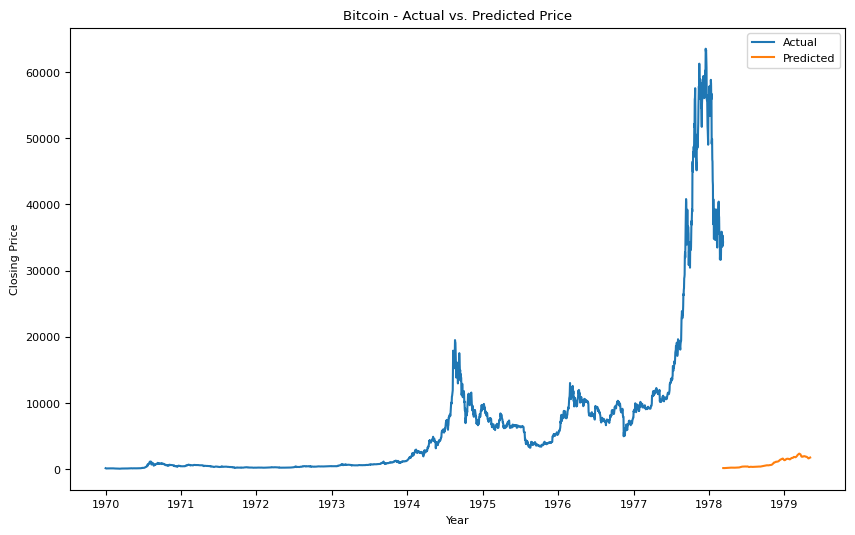

14/14 [==============================] - 0s 5ms/step


<ipython-input-40-57ed414cf78b>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({


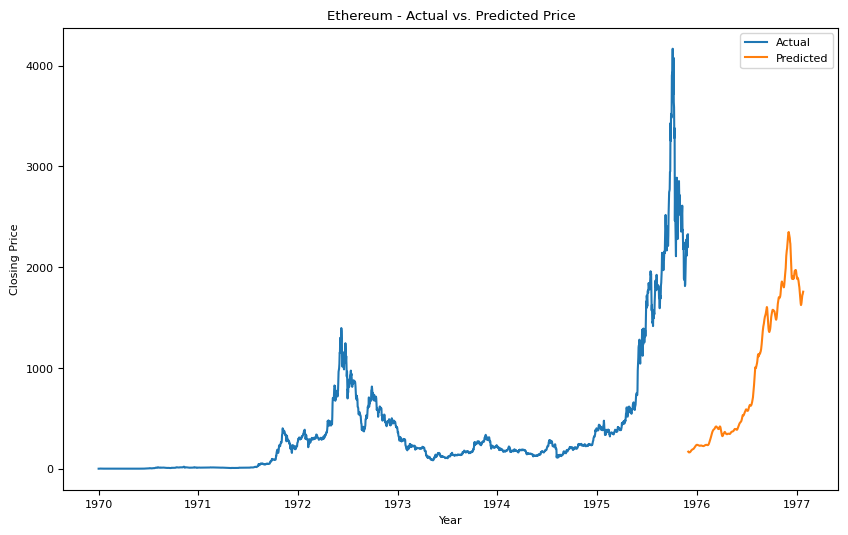

14/14 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
/usr/loc

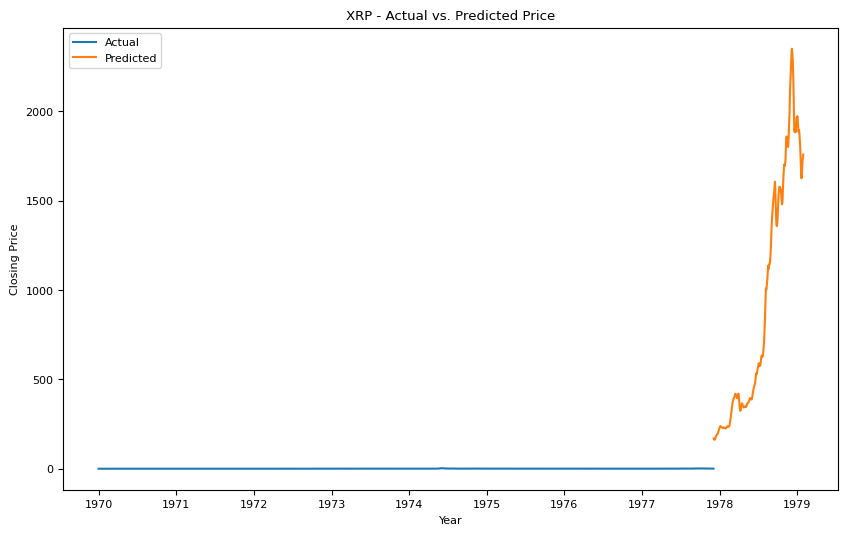

14/14 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:633: RuntimeWarning: invalid value encountered in true_divide
  numerator[valid_score] / denominator[valid_score]


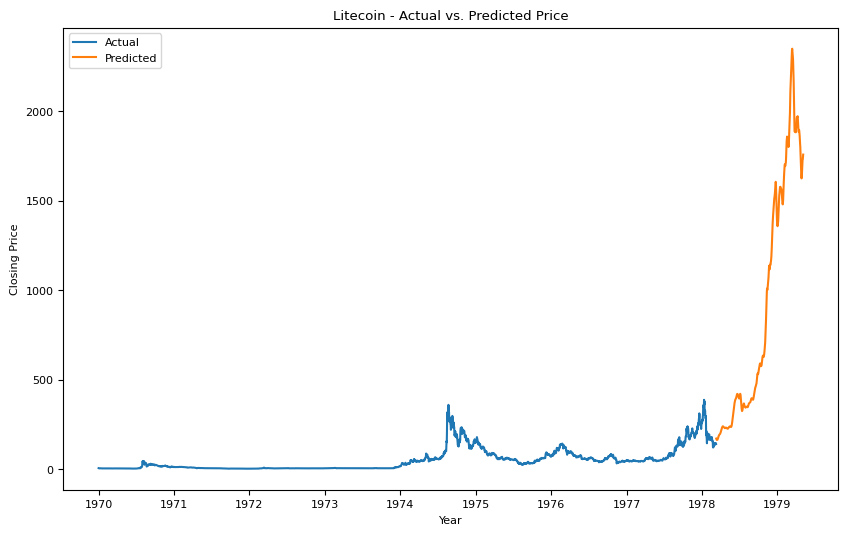

14/14 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:633: RuntimeWarning: invalid value encountered in true_divide
  numerator[valid_score] / denominator[valid_score]


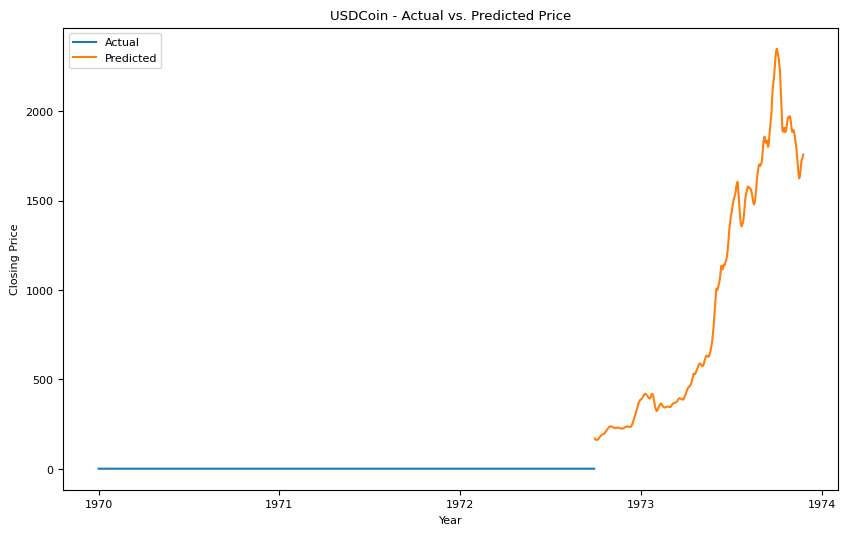

       Coin     Train RMSE      Test RMSE      Train MAE       Test MAE  \
0   Bitcoin  8.063242e+134  3.652535e+135  2.616092e+134  1.799665e+135   
1  Ethereum  2.264891e+145  1.025964e+146  7.348364e+144  5.055095e+145   
2       XRP            inf            inf  2.064088e+155  1.419930e+156   
3  Litecoin            inf            inf  5.797837e+165  3.988455e+166   
4   USDCoin            inf            inf  1.628560e+176  1.120321e+177   

   R2 Score  
0 -1.805582  
1 -1.805582  
2       NaN  
3       NaN  
4       NaN  


In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# List of coins
coins = ["Bitcoin", "Ethereum", "XRP", "Litecoin", "USDCoin"]

# Create a table to store evaluation metrics
metrics_table = pd.DataFrame(columns=["Coin", "Train RMSE", "Test RMSE", "Train MAE", "Test MAE", "R2 Score"])

# Loop through each coin
for coin in coins:
    # Step 1: Data Preprocessing
    url = f"https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_{coin}.csv"
    df = pd.read_csv(url)
    selected_features = ['Open', 'Close', 'Volume']

    # ...

    # Step 5: Model Evaluation
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)

    metrics_table = metrics_table.append({
        "Coin": coin,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "R2 Score": r2
    }, ignore_index=True)

    # Step 6: Plot Predictions
    fig, ax = plt.subplots(figsize=(10, 6))
    test_dates = pd.to_datetime(test_data['Date'], format='%Y-%m-%d %H:%M:%S')
    test_dates = test_dates.dt.strftime('%Y-%m-%d')  # Convert to string format
    ax.plot(df['Date'], df['Close'], label='Actual')
    ax.plot(test_dates[:len(test_predictions)], test_predictions[:, 1], label='Predicted')
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.set_xlabel('Year')
    ax.set_ylabel('Closing Price')
    ax.set_title(f"{coin} - Actual vs. Predicted Price")
    ax.legend()
    plt.show()

# Display the metrics table
print(metrics_table)
